# Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.svm import SVC
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

import matplotlib.pyplot as plt
# pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
loan_train=pd.read_csv("data/Training Data.csv")
print(loan_train.shape)
loan_train.head()

(252000, 13)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Preprocessing

Dropping columns that are not needed 

In [ ]:
loan_train.drop(['Id'],axis=1,inplace=True)

In [ ]:
loan_train.drop(['CITY'],axis=1,inplace=True)

In [ ]:
loan_train.shape

(252000, 11)

Checking Null Values

In [ ]:
total_null=loan_train.isnull().sum().sort_values(ascending=False)
total_null.head()

Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
dtype: int64

In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   STATE              252000 non-null  object
 8   CURRENT_JOB_YRS    252000 non-null  int64 
 9   CURRENT_HOUSE_YRS  252000 non-null  int64 
 10  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 21.1+ MB


Seeing distribution of continuous data to determine which scaling to use.<br/>
Robust Scaling - for skewed distribution
Standard Scaling - for normal distribution
Min Max Scaling - for uniform distribution

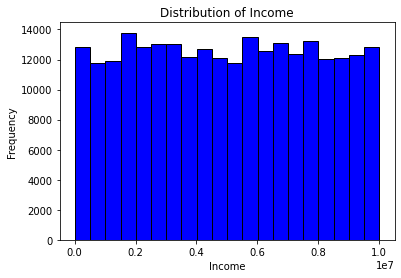

In [ ]:
plt.hist(loan_train['Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

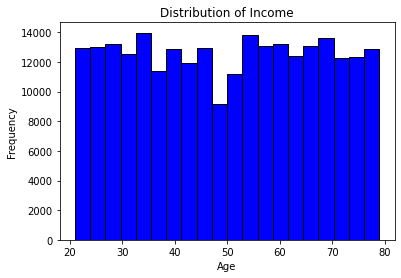

In [ ]:
plt.hist(loan_train['Age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

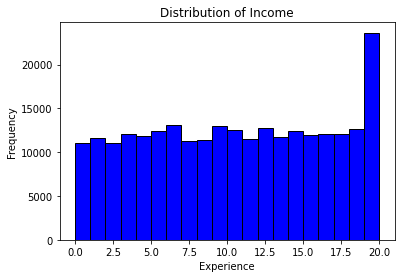

In [ ]:
plt.hist(loan_train['Experience'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

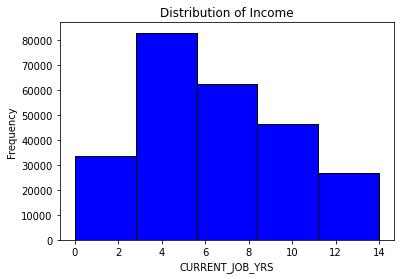

In [ ]:
plt.hist(loan_train['CURRENT_JOB_YRS'], bins=5, color='blue', edgecolor='black')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

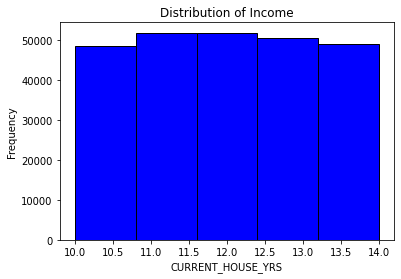

In [ ]:
plt.hist(loan_train['CURRENT_HOUSE_YRS'], bins=5, color='blue', edgecolor='black')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

Encoding of Categorical Variables

In [ ]:
loan_train.columns
for column in loan_train.columns:
  if(len(set((loan_train[column].values.tolist())))<100):
    print(column,":",len(set((loan_train[column].values.tolist()))))
    print(set((loan_train[column].values.tolist())))

Age : 59
{21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
Experience : 21
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Married/Single : 2
{'married', 'single'}
House_Ownership : 3
{'norent_noown', 'owned', 'rented'}
Car_Ownership : 2
{'yes', 'no'}
Profession : 51
{'Psychologist', 'Architect', 'Lawyer', 'Financial_Analyst', 'Police_officer', 'Engineer', 'Design_Engineer', 'Economist', 'Surveyor', 'Magistrate', 'Civil_servant', 'Firefighter', 'Technology_specialist', 'Computer_operator', 'Drafter', 'Technician', 'Army_officer', 'Microbiologist', 'Chartered_Accountant', 'Geologist', 'Secretary', 'Official', 'Air_traffic_controller', 'Aviator', 'Web_designer', 'Chef', 'Fashion_Designer', 'Comedian', 'Flight_attendant', 'Surgeon', 'Librarian', 'Mechanical_engineer', 'Software_

In [ ]:
loan_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


Scaling of the continuous variables and Encoding of the categorical variables

In [ ]:
loan_train=pd.get_dummies(loan_train,columns=['Married/Single','House_Ownership','Car_Ownership'])
mmscaler=MinMaxScaler()
rscaler=RobustScaler()
cols_to_scale_minmax=['Income','Age','CURRENT_HOUSE_YRS']
loan_train[cols_to_scale_minmax]=mmscaler.fit_transform(loan_train[cols_to_scale_minmax])
cols_to_scale_robust=['Experience','CURRENT_JOB_YRS']
loan_train[cols_to_scale_robust]=rscaler.fit_transform(loan_train[cols_to_scale_robust])

In [ ]:
loan_train.head()

,Income,Age,Experience,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,0.129487,0.034483,-0.7,Mechanical_engineer,Madhya_Pradesh,-0.500000,0.75,0,0,1,0,0,1,1,0
1,0.757206,0.327586,0.0,Software_Developer,Maharashtra,0.500000,0.75,0,0,1,0,0,1,1,0
2,0.398564,0.775862,-0.6,Technical_writer,Kerala,-0.333333,0.00,0,1,0,0,0,1,1,0
3,0.625263,0.344828,-0.8,Software_Developer,Odisha,-0.666667,0.50,1,0,1,0,0,1,0,1
4,0.576454,0.448276,0.1,Civil_servant,Tamil_Nadu,-0.500000,1.00,1,0,1,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_to_labelencode in ['Profession','STATE']:
  loan_train[col_to_labelencode] =  le.fit_transform(loan_train[col_to_labelencode])

In [ ]:
loan_train.head()

,Income,Age,Experience,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,0.129487,0.034483,-0.7,33,13,-0.500000,0.75,0,0,1,0,0,1,1,0
1,0.757206,0.327586,0.0,43,14,0.500000,0.75,0,0,1,0,0,1,1,0
2,0.398564,0.775862,-0.6,47,12,-0.333333,0.00,0,1,0,0,0,1,1,0
3,0.625263,0.344828,-0.8,43,17,-0.666667,0.50,1,0,1,0,0,1,0,1
4,0.576454,0.448276,0.1,11,22,-0.500000,1.00,1,0,1,0,0,1,1,0


In [ ]:
loan_train.shape

(252000, 15)

# Train-test split

In [ ]:
y=loan_train['Risk_Flag']
x=loan_train.drop(['Risk_Flag'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Training Models

XGBoost

In [ ]:
parameter_grid={
    'n_estimators':range(100,400),
    'max_depth':range(1,15),
    'learning_rate':[.1,0.3,0.5],
    'colsample_bytree':[0.6,0.7,0.8]
}
xgb_classifer=XGBClassifier()
xgb_random=RandomizedSearchCV(param_distributions=parameter_grid,
                              estimator=xgb_classifer,scoring='accuracy',
                              verbose=1,n_iter=15,cv=3)
xgb_random.fit(X_train,y_train)
print(f'Best Parameters:{xgb_random.best_params_}')

y_pred=xgb_random.predict(X_test)
print(f'Accuracy={np.sum(y_pred==y_test)/len(y_test)}')

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters:{'n_estimators': 146, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Accuracy=0.8975396825396825


Decision Tree

In [ ]:
decisiontree_parameter_grid={
  'max_depth':range(5,10),
  'min_samples_leaf':range(10,40,10),
  'min_samples_split':range(10,40,10),
  'criterion':['gini','entropy']
}
n_folds=3
dt=DecisionTreeClassifier(random_state=np.random.randint(0,100))

In [ ]:
dt_grid=GridSearchCV(dt,decisiontree_parameter_grid,cv=n_folds,return_train_score=True,verbose=1)
dt_grid.fit(X_train,y_train)


In [ ]:
print(dt_grid.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [ ]:
y_pred_dt=dt_grid.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred_dt)
print(acc)

0.8794444444444445


Random Forest

In [ ]:
rf_param_grid={
    'n_estimators':range(1,500,100)
}
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(param_distributions=rf_param_grid,estimator=rf,
                      scoring='accuracy',verbose=1,n_iter=10,cv=2)

In [ ]:
rf_random.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': range(1, 500, 100)},
                   scoring='accuracy', verbose=1)

In [ ]:
y_pred_rf=rf_random.predict(X_test)
print(f'Accuracy={np.sum(y_pred_rf==y_test)/len(y_test)}')

Accuracy=0.8989087301587302


One limitation of this analysis was that the model was trained for a limited number of iterations due to the availability of GPU resources. This may have resulted in sub-optimal performance and could be a potential area for further improvement. To address this limitation, additional computational resources such as a more powerful GPU could be utilized to increase the number of training iterations and improve model performance.  